<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/3_Logistic_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

#### scikit-learn을 이용한 machine learning with MNIST

Linear SVM 이용한 분류

In [1]:
# 필요한 모듈 import
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#mnist data scikit-learn
mnist = fetch_openml('mnist_784', version=1)
print(list(mnist))
X, y = mnist['data'], mnist['target']

print("X shape", X.shape); print("y shape", y.shape)

['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url']
X shape (70000, 784)
y shape (70000,)


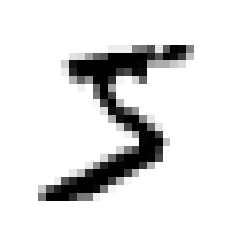

Answer= 5


In [3]:
sample=X[0]
sample = sample.reshape(28,28) # 28*28 = 784

plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print("Answer=", y[0])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [5]:
ls = LinearSVC(random_state=42)
ls.fit(X_train, y_train)

y_pred = ls.predict(X_train)
accuracy_score(y_train, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8953469387755102

In [6]:
y_pred = ls.predict(X_test)
accuracy_score(y_test, y_pred)

0.8765714285714286

Random Forest 이용한 분류

In [7]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred = ls.predict(X_train)
accuracy_score(y_train, y_pred)

0.8953469387755102

In [8]:
y_pred = ls.predict(X_test)
accuracy_score(y_test, y_pred)

0.8765714285714286

## **Logistic Regression with MNIST dataset**

#### 모듈 불러오기

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

#### 파라메터 설정

In [11]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### MNIST 데이터셋으로 데이터로더 구성

In [12]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 데이터 확인

In [13]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([100, 1, 28, 28])


In [15]:
print(images[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

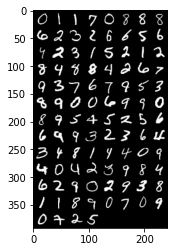

tensor([0, 1, 1, 7, 0, 8, 8, 8, 6, 2, 3, 2, 5, 6, 5, 6, 4, 2, 3, 1, 5, 2, 1, 2,
        8, 4, 8, 8, 4, 2, 6, 7, 9, 3, 7, 6, 7, 9, 5, 3, 8, 9, 0, 0, 6, 9, 9, 0,
        8, 9, 5, 4, 5, 2, 5, 6, 6, 9, 9, 3, 2, 3, 6, 4, 3, 4, 8, 1, 4, 4, 0, 9,
        4, 0, 4, 2, 3, 9, 8, 4, 6, 2, 9, 0, 2, 9, 3, 8, 1, 1, 8, 9, 0, 7, 0, 9,
        0, 7, 2, 5])


In [16]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)

#### Logistic regression model

In [17]:
model = nn.Linear(input_size, num_classes)

#### Loss and optimizer


In [18]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [19]:
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_values.append(loss.item())
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 2.2049
Epoch [1/5], Step [200/600], Loss: 2.1088
Epoch [1/5], Step [300/600], Loss: 2.0186
Epoch [1/5], Step [400/600], Loss: 1.9389
Epoch [1/5], Step [500/600], Loss: 1.8339
Epoch [1/5], Step [600/600], Loss: 1.7857
Epoch [2/5], Step [100/600], Loss: 1.6680
Epoch [2/5], Step [200/600], Loss: 1.6910
Epoch [2/5], Step [300/600], Loss: 1.5865
Epoch [2/5], Step [400/600], Loss: 1.6349
Epoch [2/5], Step [500/600], Loss: 1.5535
Epoch [2/5], Step [600/600], Loss: 1.5117
Epoch [3/5], Step [100/600], Loss: 1.5130
Epoch [3/5], Step [200/600], Loss: 1.2797
Epoch [3/5], Step [300/600], Loss: 1.3722
Epoch [3/5], Step [400/600], Loss: 1.2409
Epoch [3/5], Step [500/600], Loss: 1.3120
Epoch [3/5], Step [600/600], Loss: 1.1946
Epoch [4/5], Step [100/600], Loss: 1.2934
Epoch [4/5], Step [200/600], Loss: 1.1824
Epoch [4/5], Step [300/600], Loss: 1.1704
Epoch [4/5], Step [400/600], Loss: 1.0452
Epoch [4/5], Step [500/600], Loss: 1.0928
Epoch [4/5], Step [600/600], Loss:

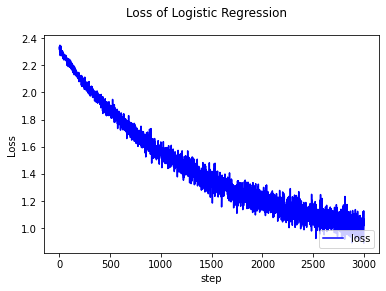

In [20]:
#학습 그래프 출력

fig, loss_ax = plt.subplots()

loss_ax.plot(loss_values, 'b', label='loss',  fillstyle='none')

loss_ax.set_xlabel('step')
loss_ax.set_ylabel('Loss')
fig.suptitle('Loss of Logistic Regression')

loss_ax.legend(loc='lower right')


plt.show()

#### Test the model

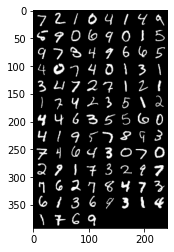

ground truth:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
predicted:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 0, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 4, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 3, 2,
        4, 4, 6, 3, 5, 3, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9, 0, 4, 3, 0, 7, 0,
        0, 8, 1, 7, 3, 7, 1, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 8, 3, 1, 4,
        1, 1, 6, 9])


In [21]:
with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    

    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

In [22]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct.item() / total))

Accuracy of the model on the 10000 test images: 82.66 %
